# Statistical & Machine Learning Methods Modeling
First code block is importing libraries and the csv's

In [49]:
    # Importing libraries
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Getting data
    baseline = pd.read_csv('patient_baseline.csv', sep='\t')
    longitudinal = pd.read_csv('patient_longitudinal.csv', sep='\t')
    treatment = pd.read_csv('patient_treatment.csv', sep='\t')


## Time Series Tasks
Visit_date is turned into a DateTime index, then the data is sorted and cleaned. After calculating the monthly bp frequency and the 3 month rolling average, both are shown side by side in the plot, where you can see how the 3 month average smooths out any breaks in the monthly.

C:\Users\borau\AppData\Local\Temp\ipykernel_12848\2827793846.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bp_monthly = longitudinal['bp_systolic'].resample('M').mean()


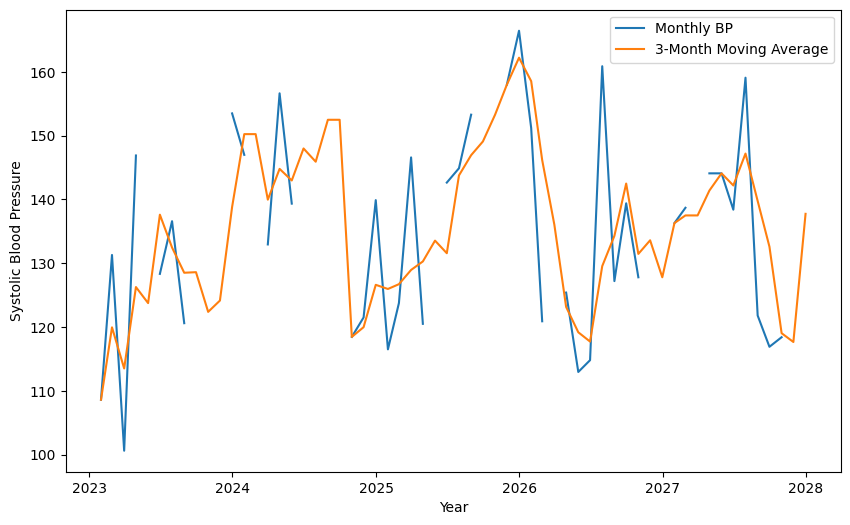

In [ ]:
# Converting visit_date to DateTime index
longitudinal['visit_date'] = pd.to_datetime(longitudinal['visit_date'])

# Sorting the index
longitudinal = longitudinal.set_index('visit_date').sort_index()

# Tossing out any duplicate values
longitudinal = longitudinal[~longitudinal.index.duplicated(keep='first')]

# Interpolating missing values
longitudinal.interpolate(method='time', inplace=True)  

# Getting the monthly frequency
bp_monthly = longitudinal['bp_systolic'].resample('M').mean()

# Getting 3 month rolling average
bp_3month = bp_monthly.rolling(window=3, min_periods=1).mean()

#Making the plot
plt.figure(figsize=(10, 6))
plt.plot(bp_monthly, label='Monthly BP')
plt.plot(bp_3month, label='3-Month Moving Average')
plt.xlabel('Year')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.show()


## Statistical Modeling Tasks
Part 1

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.65e-100
Time:                        12:42:39   Log-Likelihood:                -3700.7
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     995   BIC:                             7436.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4929      2.000     54.252      0.0

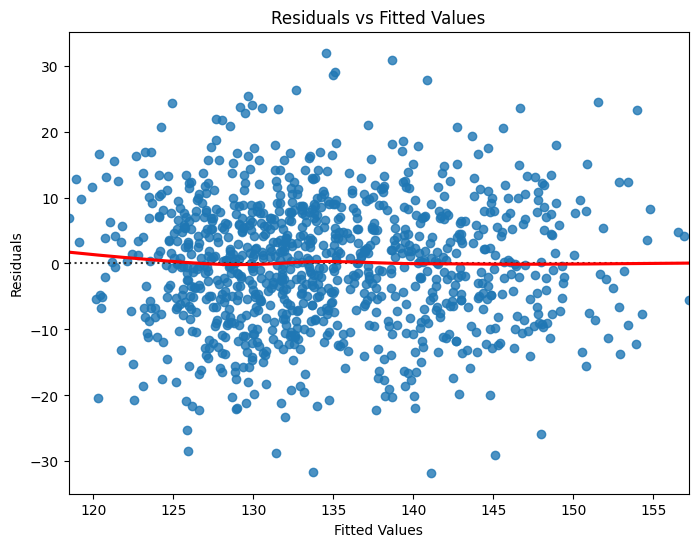

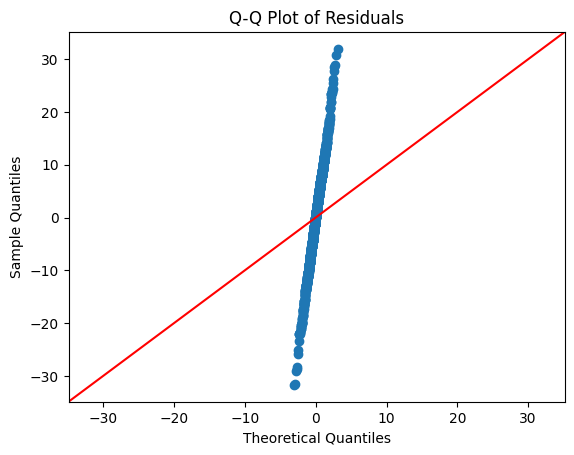

In [ ]:
# Data prep
X = baseline[['age', 'bmi', 'smoking', 'diabetes']]
y = baseline['bp_systolic']
X = sm.add_constant(X)  # Adds a constant term to the model

# Fitting OLS model
ols_model = sm.OLS(y, X).fit()

# Printing model summary
print(ols_model.summary())

# Making residual v fitted plot
plt.figure(figsize=(8, 6))
sns.residplot(x=ols_model.fittedvalues, y=ols_model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Making Q-Q Plot
sm.qqplot(ols_model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


Part 2

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      994
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -656.42
Date:                Wed, 06 Nov 2024   Deviance:                       1312.8
Time:                        12:42:46   Pearson chi2:                 1.00e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01896
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2681      0.691     -1.836      0.0

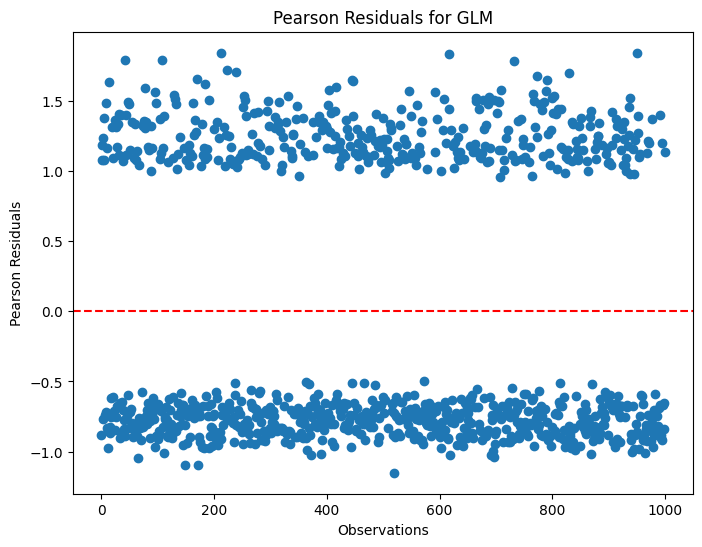

In [ ]:
# Preparing the data
X_treatment = treatment[['age', 'bmi', 'smoking', 'diabetes', 'adherence']]
y_treatment = treatment['outcome']
X_treatment = sm.add_constant(X_treatment)  # Adds a constant term

# Fitting GLM model for logistic regression
glm_model = sm.GLM(y_treatment, X_treatment, family=sm.families.Binomial()).fit()

# Displaying  model summary
print(glm_model.summary())

# Calculating odds ratios
odds_ratios = np.exp(glm_model.params)
print("\nOdds Ratios and Confidence Intervals:")
print(odds_ratios)

# Making residauls plot 
plt.figure(figsize=(8, 6))
plt.plot(glm_model.resid_pearson, 'o')
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Observations')
plt.ylabel('Pearson Residuals')
plt.title('Pearson Residuals for GLM')
plt.show()
